# **Neural Network Assignment 5**
**MTech AAI, Sem 2, Cohort 1**,
**Student Name**: Syed Mohd Haider Rizvi,
**Roll No.**: MT23AAI023

## **CIFAR‑10 Image Classification: Performance Evaluation with Different Optimizers**

**1. Dataset Overview**

CIFAR‑10 Dataset

**Source:** CIFAR‑10 Dataset Information

**Details:**

Images: 60,000 color images (32×32 pixels)

Classes: 10 categories (e.g., airplane, automobile, bird, cat, etc.)

Split: 50,000 training images and 10,000 test images

**Task:** Multi-class image classification


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

Training with optimizer: SGD


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
704/704 - 55s - 78ms/step - accuracy: 0.2724 - loss: 1.9575 - val_accuracy: 0.4268 - val_loss: 1.5738
Epoch 2/10
704/704 - 53s - 75ms/step - accuracy: 0.4293 - loss: 1.5652 - val_accuracy: 0.4994 - val_loss: 1.3993
Epoch 3/10
704/704 - 83s - 118ms/step - accuracy: 0.4952 - loss: 1.4088 - val_accuracy: 0.5566 - val_loss: 1.2134
Epoch 4/10
704/704 - 83s - 117ms/step - accuracy: 0.5417 - loss: 1.2945 - val_accuracy: 0.5992 - val_loss: 1.1568
Epoch 5/10
704/704 - 82s - 116ms/step - accuracy: 0.5732 - loss: 1.2069 - val_accuracy: 0.6394 - val_loss: 1.0204
Epoch 6/10
704/704 - 54s - 76ms/step - accuracy: 0.5987 - loss: 1.1384 - val_accuracy: 0.6406 - val_loss: 1.0299
Epoch 7/10
704/704 - 83s - 118ms/step - accuracy: 0.6240 - loss: 1.0785 - val_accuracy: 0.6476 - val_loss: 1.0105
Epoch 8/10
704/704 - 55s - 79ms/step - accuracy: 0.6388 - loss: 1.0252 - val_accuracy: 0.6712 - val_loss: 0.9349
Epoch 9/10
704/704 - 52s - 74ms/step - accuracy: 0.6590 - loss: 0.9820 - val_accuracy: 0.669

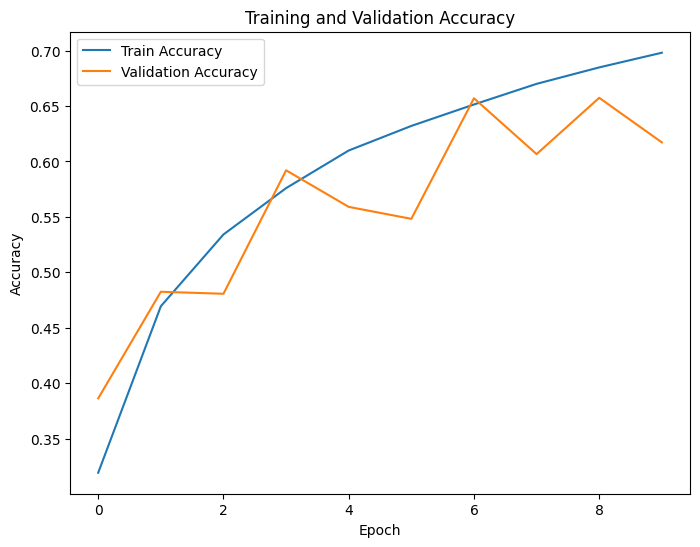

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import matplotlib.pyplot as plt

# --------------------------
# Data Loading and Preprocessing
# --------------------------
# CIFAR-10 dataset:
# - 60,000 color images (32x32 pixels) in 10 classes.
# - 50,000 training images and 10,000 test images.
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data()

# Normalize pixel values to the [0, 1] range.
x_train, x_test = x_train / 255.0, x_test / 255.0

# --------------------------
# Model Building Function
# --------------------------
def build_model(num_filters=32, kernel_size=(3, 3), dropout_rate=0.5):
    """
    Builds a simple CNN model.

    Parameters:
      num_filters: number of filters for the first conv layer.
      kernel_size: size of the convolution kernels.
      dropout_rate: dropout rate for the dropout layer.

    Returns:
      Compiled Keras model.
    """
    model = models.Sequential()
    # First convolutional block
    model.add(layers.Conv2D(num_filters, kernel_size, activation='relu', input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second convolutional block with increased filters
    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Third convolutional block
    model.add(layers.Conv2D(num_filters * 2, kernel_size, activation='relu'))

    # Flatten and add dense layers
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(dropout_rate))
    model.add(layers.Dense(10, activation='softmax'))

    return model

# --------------------------
# Define Different Optimizers
# --------------------------
optimizers_config = {
    'SGD': optimizers.SGD(learning_rate=0.01, momentum=0.9),
    'Adam': optimizers.Adam(learning_rate=0.001),
    'RMSprop': optimizers.RMSprop(learning_rate=0.001)
}

# Training hyperparameters
batch_size = 64
epochs = 10  # For demonstration; increase epochs for better performance

# Dictionary to store test accuracy results for each optimizer
results = {}

# --------------------------
# Training Loop: Evaluate Different Configurations
# --------------------------
for opt_name, opt in optimizers_config.items():
    print(f"\nTraining with optimizer: {opt_name}")
    model = build_model(num_filters=32, dropout_rate=0.5)
    model.compile(optimizer=opt,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    # Fit the model (using 10% of training data as validation)
    history = model.fit(x_train, y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_split=0.1,
                        verbose=2)

    # Evaluate on the test set
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
    print(f"Test accuracy with {opt_name}: {test_acc:.4f}")
    results[opt_name] = test_acc

# --------------------------
# Summarize Results
# --------------------------
print("\nSummary of results:")
for opt, acc in results.items():
    print(f"Optimizer: {opt}, Test Accuracy: {acc:.4f}")
best_optimizer = max(results, key=results.get)
print(f"\nBest performing optimizer: {best_optimizer}")

# --------------------------
# Plot Training History for the Last Model (for visual inspection)
# --------------------------
plt.figure(figsize=(8, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

**3. Output and Performance Evaluation**


Summary of Results

**Best performing optimizer: SGD**

**4. Recommendations**

**Optimizer Choice:**
The results show that the SGD optimizer achieved the highest test accuracy **(≈68.18%).**

**Training Trends:**

The training logs indicate that accuracy improved steadily over the epochs, with SGD converging effectively.

Adam and RMSprop show competitive performance but did not match the accuracy of SGD in this experiment.
